### use data from [Catent-Gaudin(2020)](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/640/A1)

In [5]:
from astropy.io.votable import parse_single_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('../shao.mplstyle')

In [6]:
path_table1 = '../../data/Cantat-Gaudin_2020/table1.vot' # 星团表格
path_nodup = '../../data/Cantat-Gaudin_2020/nodup.vot' # 成员星表格

In [5]:
# 读取VOTable文件
t1 = parse_single_table(path_table1)
t2 = parse_single_table(path_nodup)
# 将Table对象转换为pandas DataFrame格式
table1 = t1.to_table().to_pandas()
nodup = t2.to_table().to_pandas()

#### condition 1 : ( AgeNN >= 8 ) & ( DistPc <= 500 )

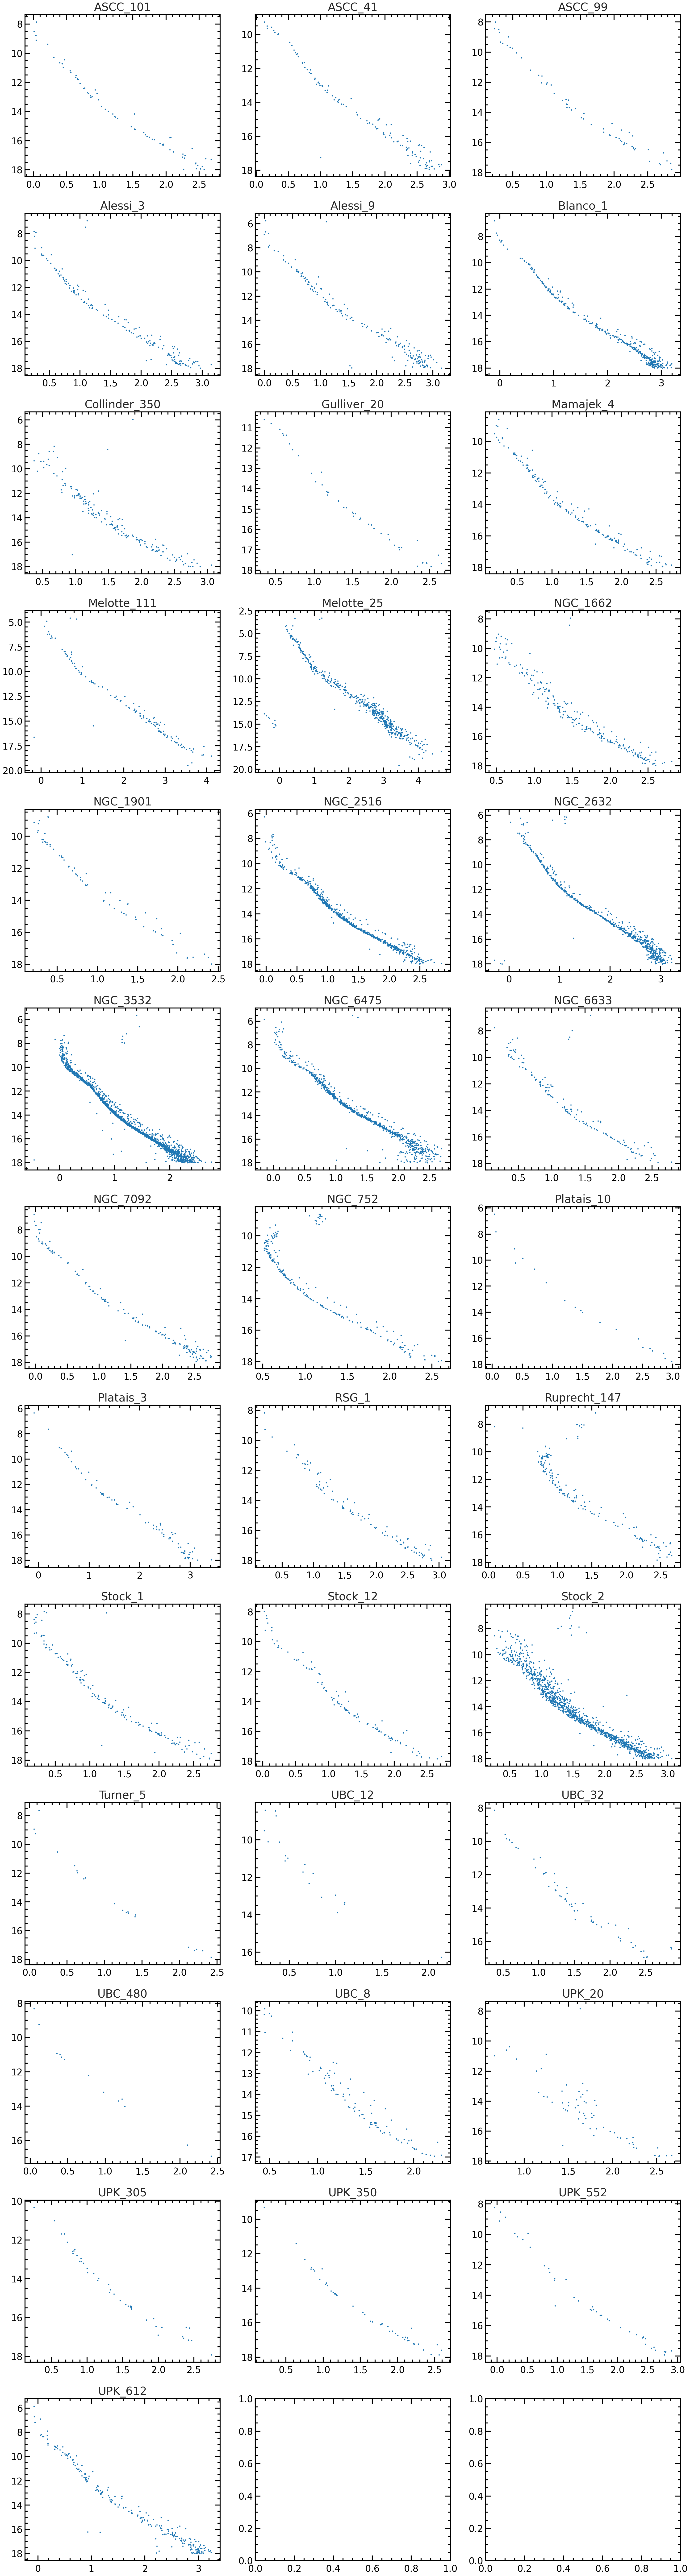

In [61]:
t = table1[(table1['AgeNN'] >=8) & (table1['DistPc'] <=500)]
cluster_list = t['Cluster']

# 设置子图布局
ncols=3
nrows = int(len(cluster_list) / ncols + len(cluster_list) % ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 55),dpi=200)

for i,cluster in enumerate(cluster_list):
    c = nodup[nodup['Cluster']==cluster]
    G = c['Gmag']
    BP_RP = c['BP-RP']
    # 计算子图索引
    row_index = i // 3
    col_index = i % 3
    # 在对应的子图中绘制图形
    axs[row_index, col_index].scatter(BP_RP,G,s=1)
    axs[row_index, col_index].set_title(cluster)
    axs[row_index, col_index].invert_yaxis()
# 调整子图布局和间距
fig.tight_layout(pad=1.0)

# 保存为PDF文件
plt.savefig('./figure/condition1.pdf')

#### condition 2 : ( AgeNN <= 8 ) & ( DistPc <= 500 ) & ( Number >= 50 )

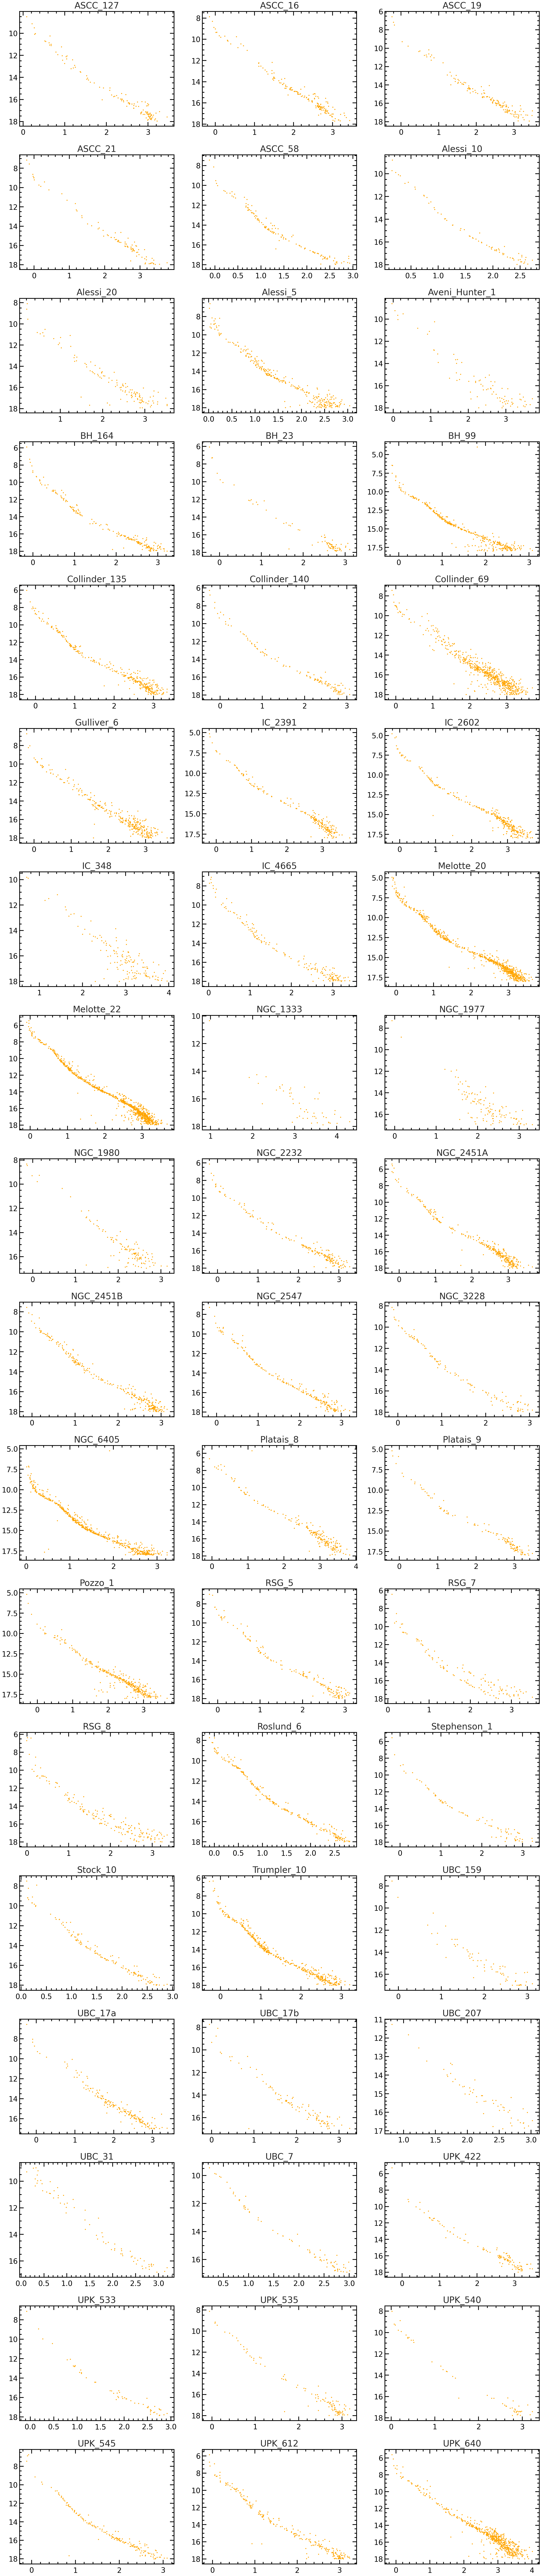

In [73]:
t = table1[(table1['AgeNN'] <=8) & (table1['DistPc'] <=500) & (table1['nbstars07'] >= 50)]
cluster_list = t['Cluster']

# 设置子图布局
ncols = 3
nrows = int(len(cluster_list) / ncols + len(cluster_list) % ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 70),dpi=200)

for i,cluster in enumerate(cluster_list):
    c = nodup[nodup['Cluster']==cluster]
    G = c['Gmag']
    BP_RP = c['BP-RP']
    # 计算子图索引
    row_index = i // 3
    col_index = i % 3
    # 在对应的子图中绘制图形
    axs[row_index, col_index].scatter(BP_RP,G,s=1,color='orange')
    axs[row_index, col_index].set_title(cluster)
    axs[row_index, col_index].invert_yaxis()
# 调整子图布局和间距
fig.tight_layout(pad=1.0)

# 保存为PDF文件
plt.savefig('./figure/condition2.pdf')

In [4]:
print(table1[table1['Cluster']=='Melotte_22'])

print('Gmag min:%f max:%f'%(min(nodup['Gmag']),max(nodup['Gmag'])))

print('Gmag Malotte_22 min:%f max:%f'%(min(nodup[nodup['Cluster']=='Melotte_22']['Gmag']),max(nodup[nodup['Cluster']=='Melotte_22']['Gmag'])))

        Cluster    RA_ICRS  DE_ICRS    r50  nbstars07   pmRA_       pmDE  \
736  Melotte_22  56.601002   24.114  1.274        952  20.077 -45.502998   

       plx Flag  AgeNN  AVNN  DMNN  DistPc      X     Y     Z     Rgc  \
736  7.346   NN   7.89  0.18  5.55   128.0 -114.0  27.0 -51.0  8454.0   

        SimbadName  _RA.icrs  _DE.icrs  
736  Cl Melotte 22   56.6009   24.1142  
Gmag min:3.289985 max:19.563677
Gmag Malotte_22 min:5.426652 max:17.957184


#### save all cluster to `cluster_name.csv` as obeservation file

In [38]:
name_list = set(nodup['Cluster'])
# for i,name in enumerate(name_list):
#     sample_obs = nodup[nodup['Cluster']==name].reset_index(drop=True)
#     sample_obs.to_csv('../../data/Cantat-Gaudin_2020/%s.csv'%(name),index=False)
print('number of cluster: ',len(name_list))

number of cluster:  2017


#### create `UNCER_FIT.csv` : fit mag and mag_err

In [46]:
name_list = table1[table1['nbstars07']>200]['Cluster']
print(len(name_list))

258


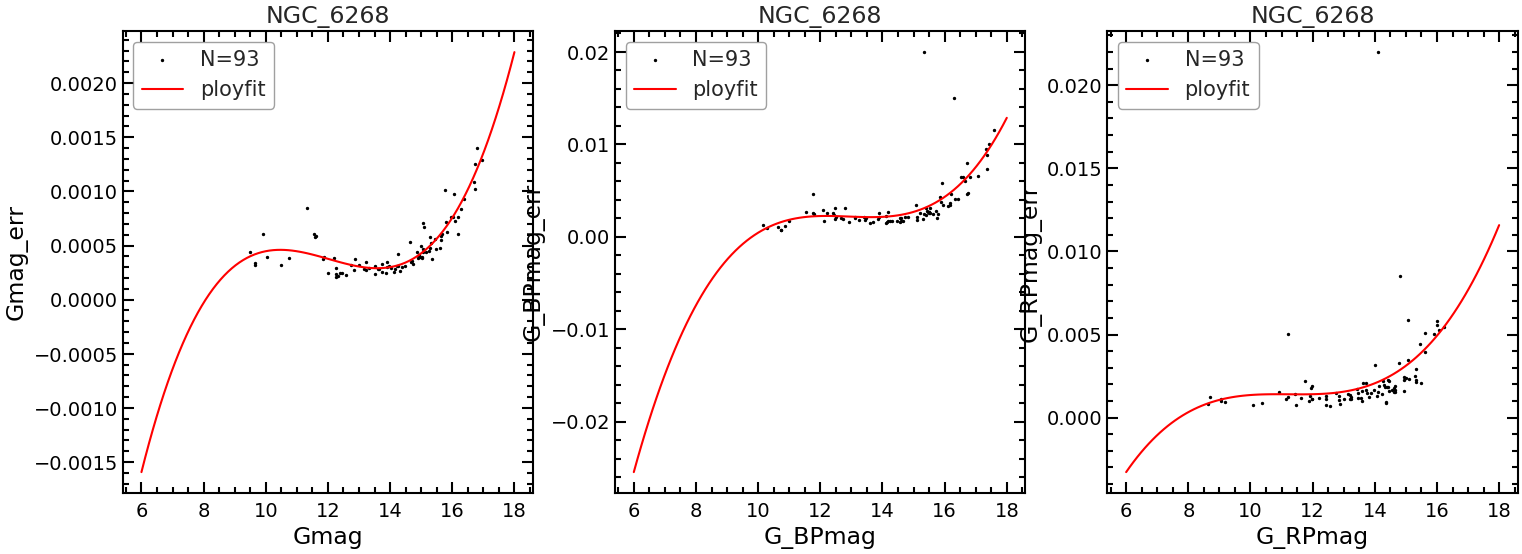

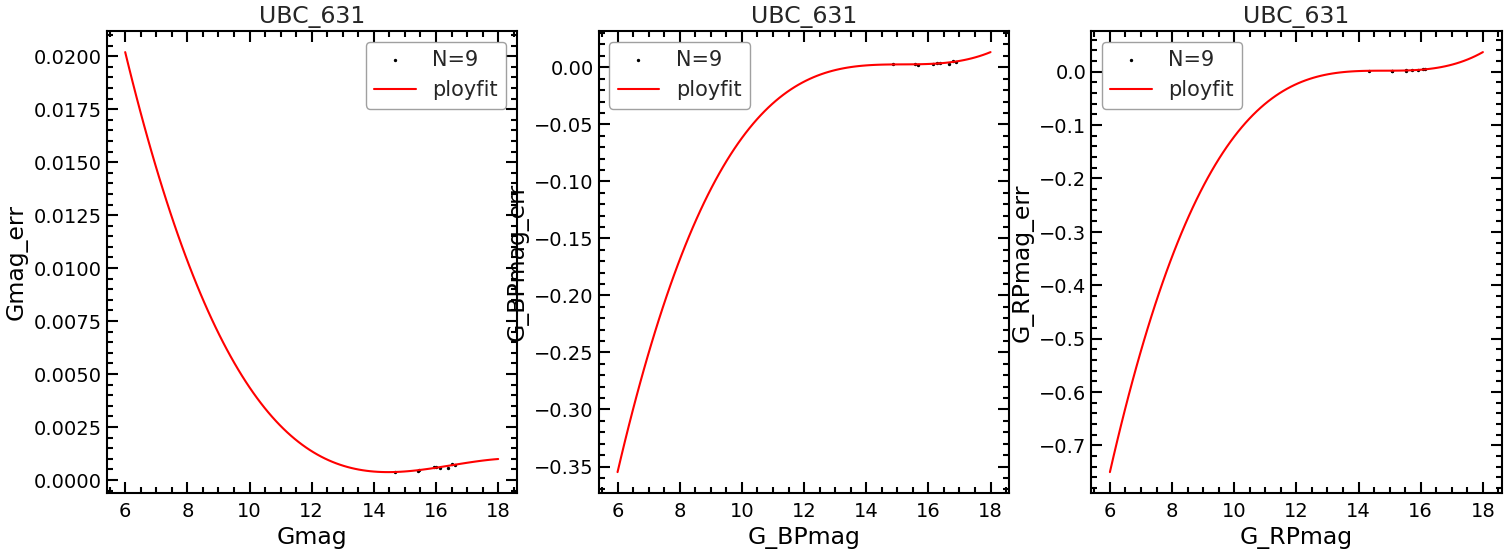

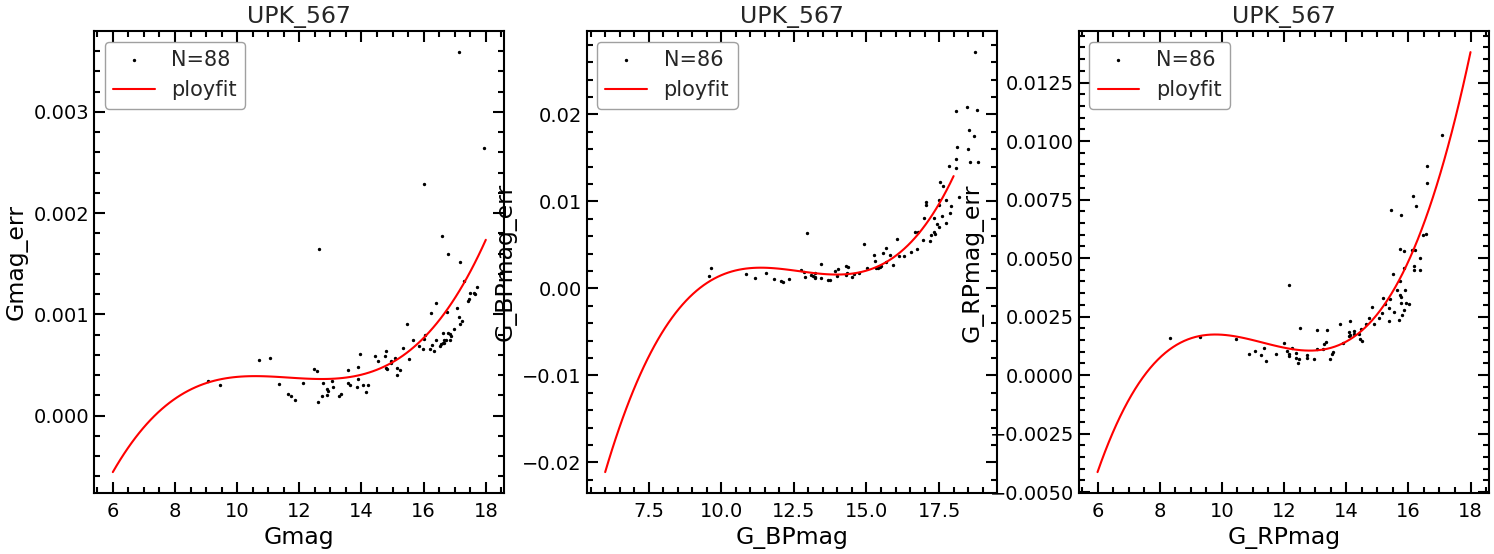

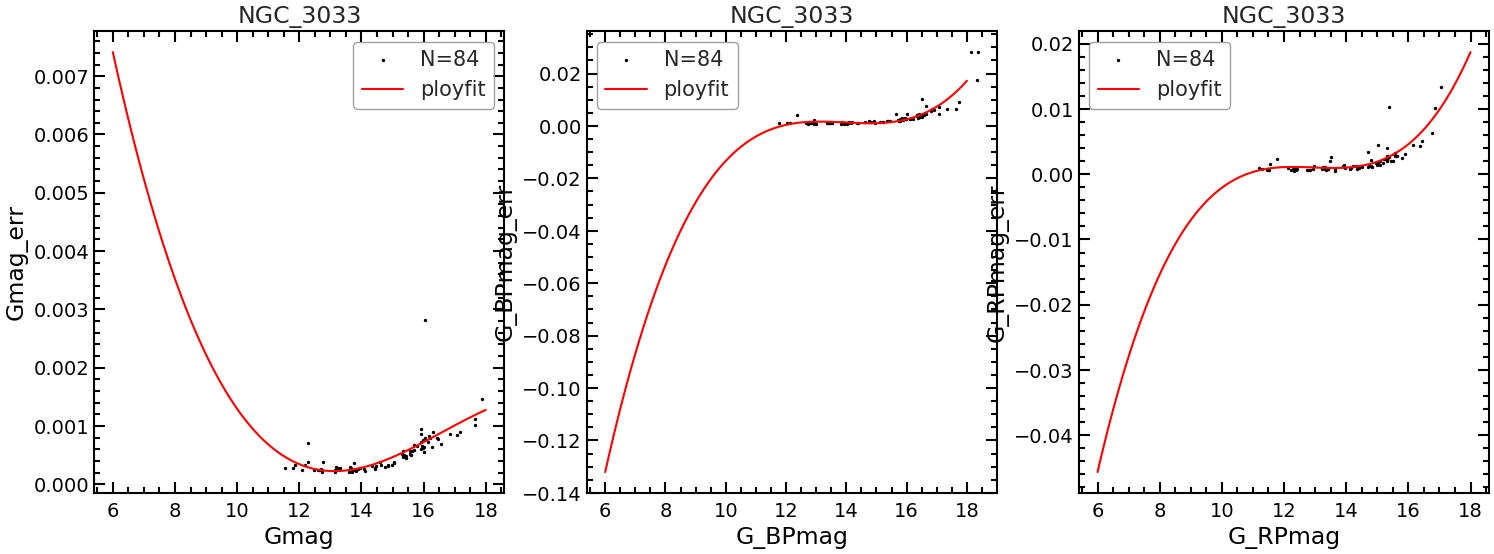

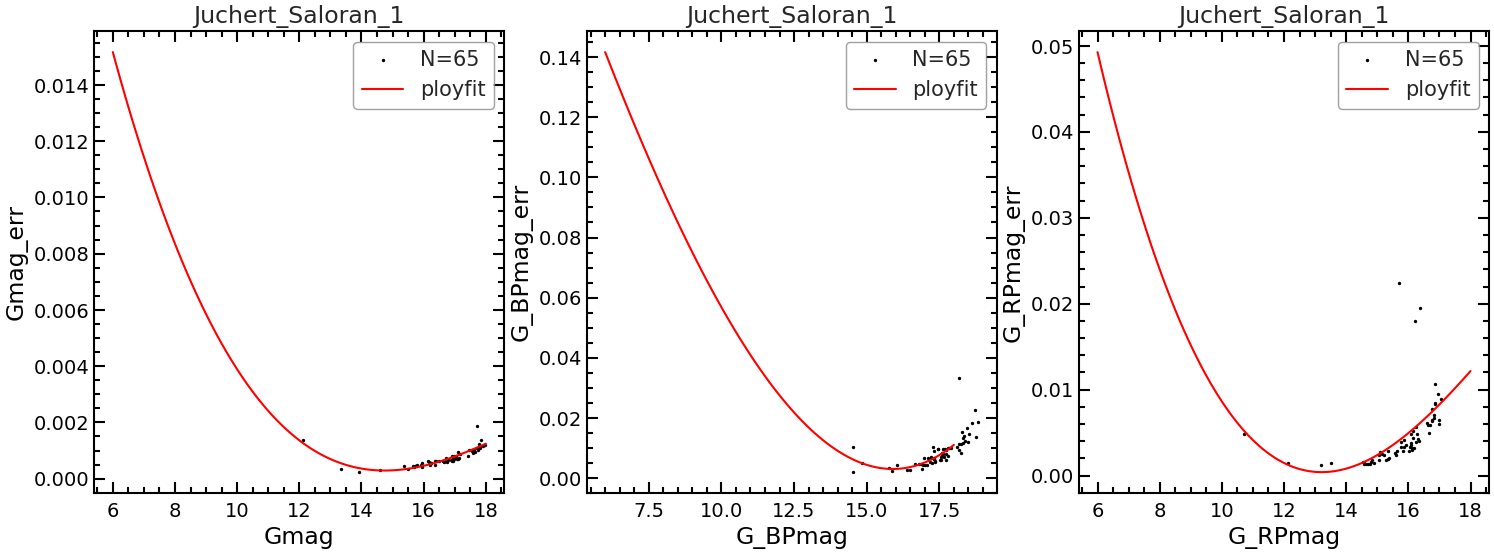

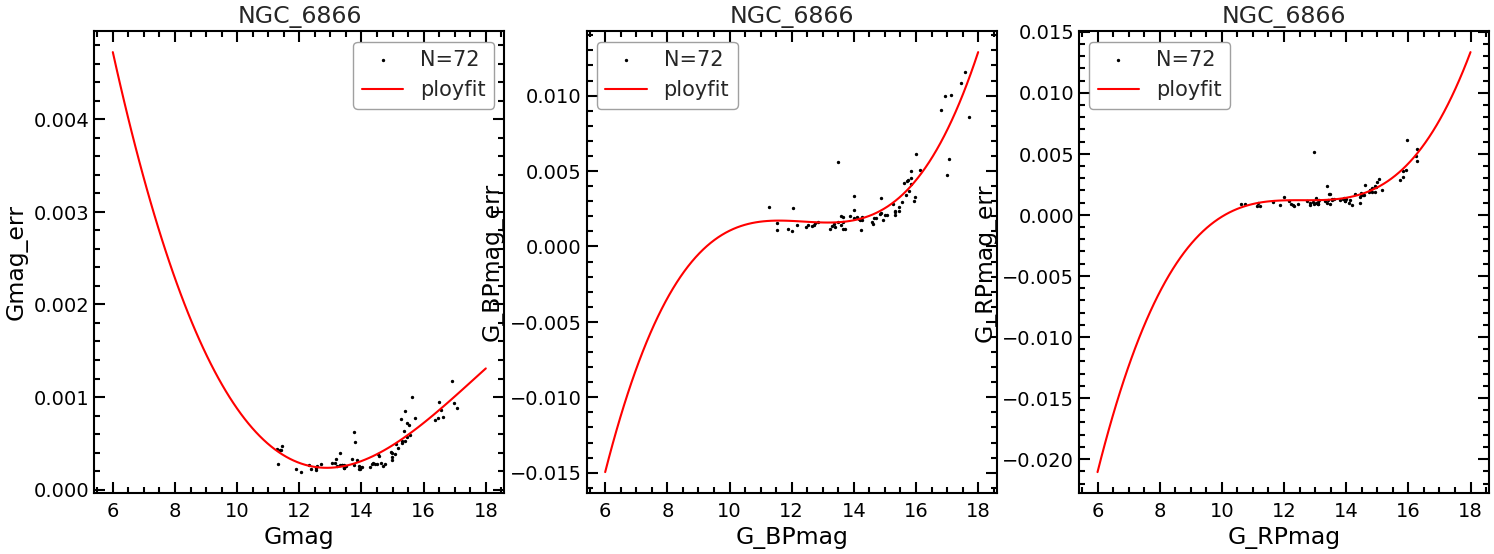

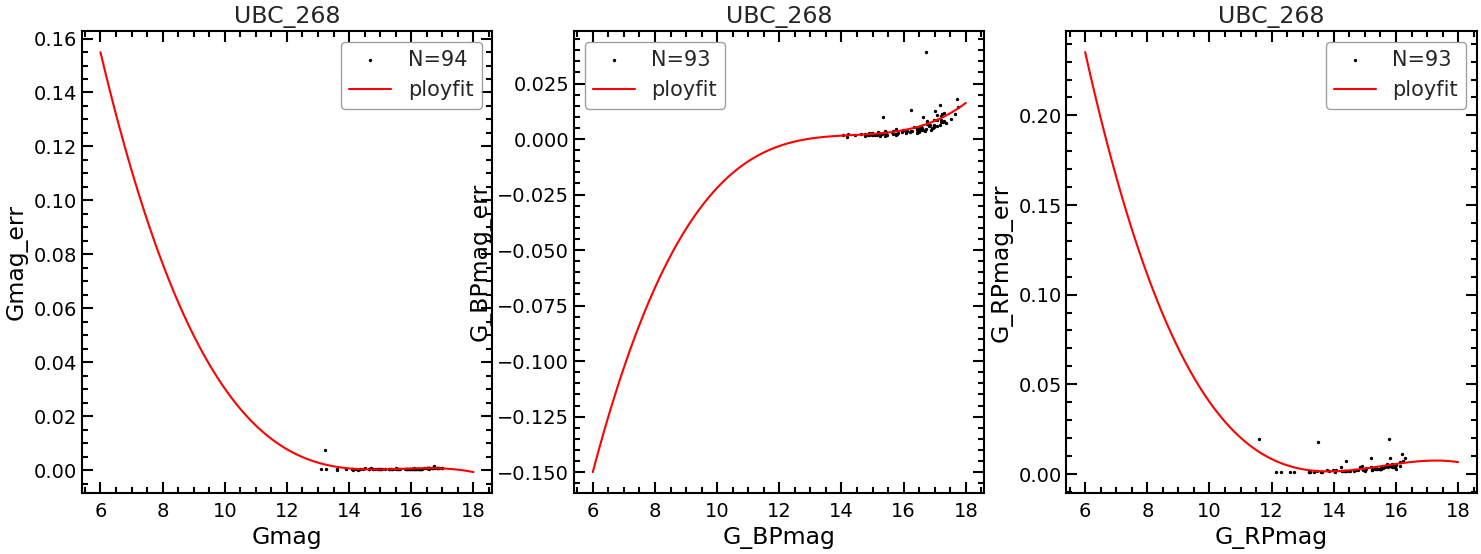

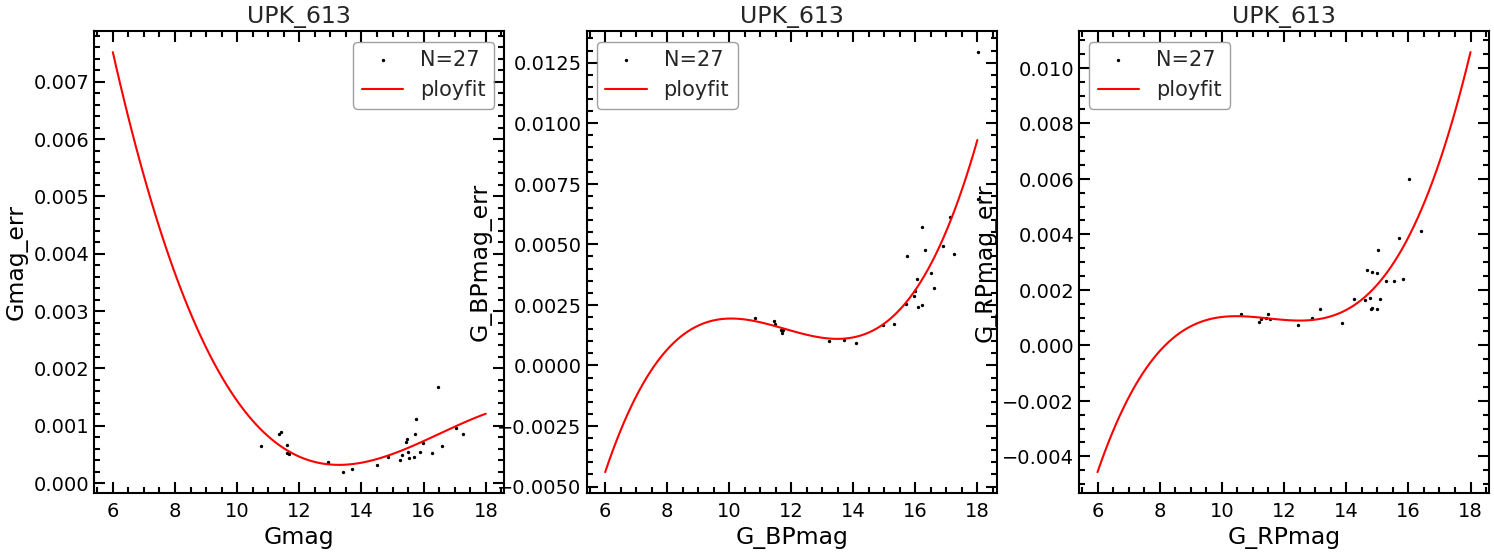

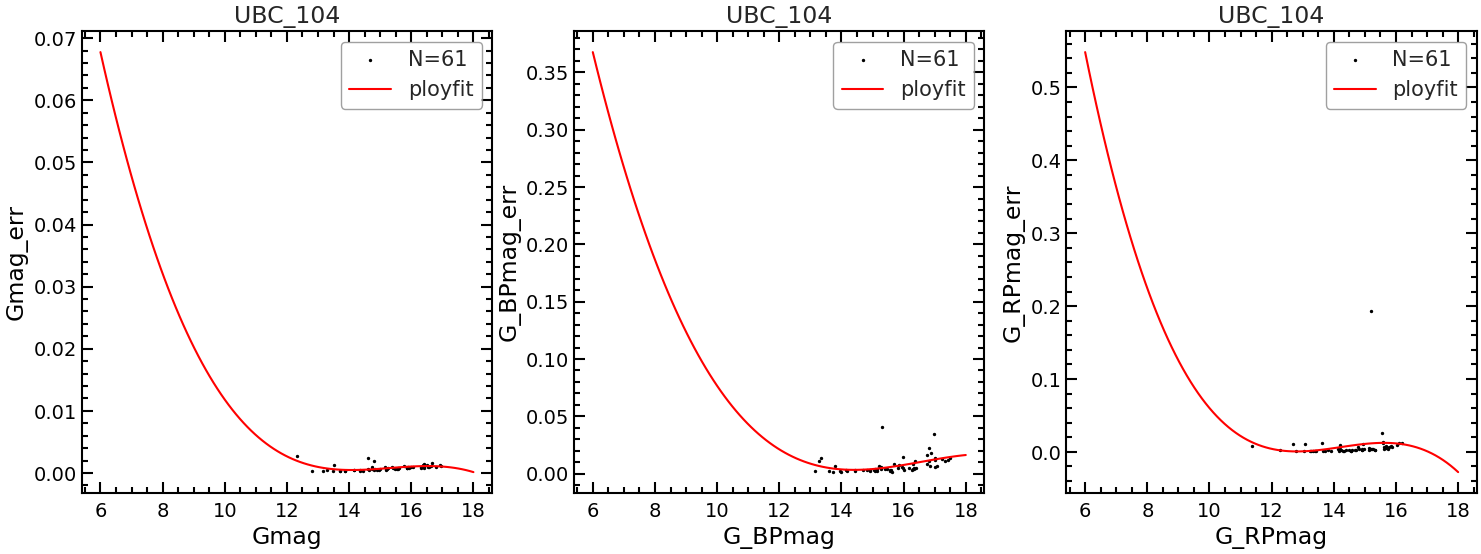

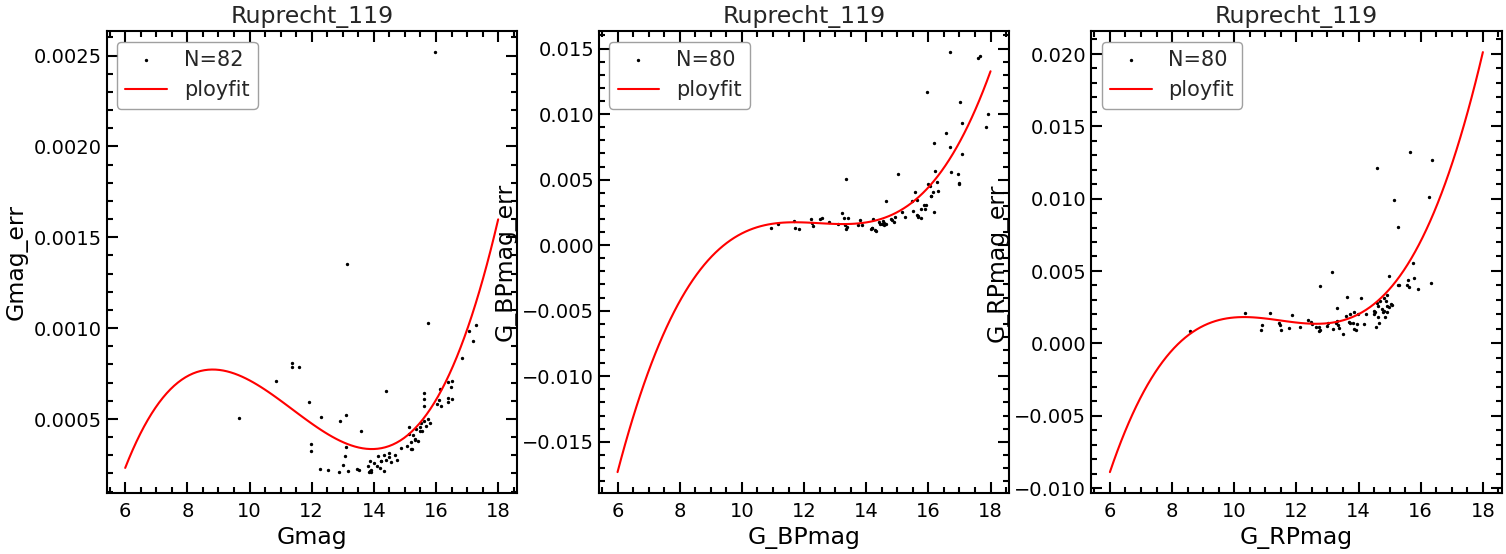

In [9]:
for name in list(name_list)[0:10]:
    cat = nodup[nodup['Cluster']==name]
    band = ['Gmag', 'G_BPmag', 'G_RPmag']
    band_err = ['Gmag_err', 'G_BPmag_err', 'G_RPmag_err']

    # 创建一个包含3个子图的图形
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    # 循环绘制三个子图
    for i in range(3):
        xdata = cat[band[i]]
        ydata = cat[band_err[i]]
        # 去掉nan值
        mask = ~np.isnan(xdata) & ~np.isnan(ydata)
        xdata = xdata[mask]
        ydata = ydata[mask]
        
        # 进行多2次项式拟合
        poly_coeffs = np.polyfit(xdata, ydata, 3)
        xfine = np.linspace(6, 18, 100)
        
        # 在当前子图上绘制散点图
        axs[i].scatter(cat[band[i]], cat[band_err[i]], s=2, c='k',label='N=%d'%(len(xdata)))
        axs[i].plot(xfine, np.polyval(poly_coeffs, xfine), 'r-', label='ployfit')
        axs[i].legend()
        # 设置标签
        axs[i].set_ylabel(band_err[i])
        axs[i].set_xlabel(band[i])
        #axs[i].set_ylim(0,0.02)
        axs[i].set_title(name)
        axs[i].legend()
    # 显示图形
    plt.show()